## Supervised Learning System Evaluation

## Classification Evaluation Metrics

### Basic Terminology
- <b>True Positive (TP): </b> the positive examples in the test set that were classified <u>correctly</u> as positive examples
- <b>False positive (FP): </b> the negative examples in the test set that were classified <u>wrongly</u> as positive examples
- <b>True Negative (TN): </b> the negative examples in the test set that were classified <u>correctly</u> as negative exmples
- <b>False Negative (FN): </b> the positive examples in the test set that wew classified <u>wrongly</u> as negative exmples</br></br>

In binary classification those three categories constructs what is known as the confusion matrix</br></br>
<center><img src="images/confusionMatrix.jpg" width=300></img></center>

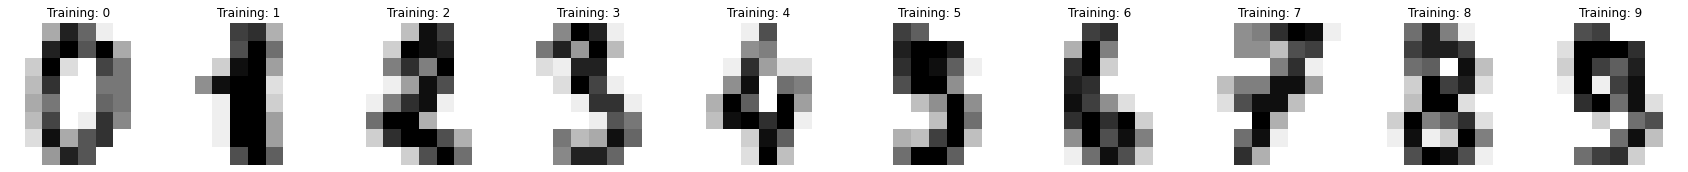

In [4]:
from hmac import digest
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt

digits = load_digits()

_, axes = plt.subplots(nrows=1, ncols=10, figsize=(30, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [10]:
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

predictor = SVC(gamma=0.001).fit(X_train, y_train)
y_pred = predictor.predict(X_test)

In [11]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, y_pred)
print(confusion)

[[402   1]
 [  3  44]]


To Evaluate a model we should keep in mind we do not only want to get good predictions but there is a bussiness demand we should fit.

#### Examples
- <b>In breast cancer example: </b> it is important to avoid false negative more than any thing
- <b>In autonoumus driving problem: </b> it is important to avoid accidants. If we are using obesticals detection algorithm it is important to aboid false negative
- <b>In robot lifitng problem: </b> it is important to avoid false positive

### Evaluation Metrics
#### Accuracy
Simply it is the sum of correctly classified examples over all test samples

$Accuracy = \frac{TP + TN}{TP + FN + TN + FP}$

##### Advantages
- Accuracy's logic is straight forward
- It is enough if you have balanced data
- It is enough if all what you need is to obtain how many example was classified successfully

##### Disadvantage
- Fails in giving a good idea about system behavior when the data is unbalanced
- Do not give an accurate view regarding each class. IT gives generalized idea
- The effect of the majority class dominates


In [ ]:
print("predictor score is: {:.2f}".format(predictor.score(X_test, y_test)))

#### Percision
Measures how many of the samples predicted as positive are actually positive


$Percision = \frac{TP}{TP + FP}$

- Used as evaluation metric when the goal is to limit false positive.
- For example when the goal is to test if a new drug is effective in in treating a disease in clinical trials.

#### Recall
Measures how many of the positive samples are captured by the poisitve prediction


$Recall = \frac{TP}{TP + FN}$

- Used as evaluation metric when the goal is to limit false negative.
- For example in the breast cancer data set it is important to avoid false negative.

##### Note
- you can reach good recall if you predicted all examples as positive examples. There will not be fals negatives
- although recall and percision are very important metrics but they do not give the full picture about model performance

#### F-Score
F-score is the harmonic mean of percision and recall</br></br>
$F = \frac{2}{\frac{1}{Percision} + \frac{1}{Recall}}$</br></br>
$F = 2 * \frac{Percision * Recall}{Percision + Recall}$

In [12]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.99      1.00      1.00       403
        True       0.98      0.94      0.96        47

    accuracy                           0.99       450
   macro avg       0.99      0.97      0.98       450
weighted avg       0.99      0.99      0.99       450



<b>macro avg: </b> the sum of different classes percision or recall divided by the number of classes
<b>weighted avg: </b> the sum of weighted  classes percision and recall

## Regression Evaluation Metrics
### Mean Square Error
$MSE = \frac{1}{n} \sum_{i=1}^{n}{(Y_i - \^Y_i)^2}$

### Absolute Mean Error
$Absolute Error = \frac{1}{n} \sum_{i=1}^{n}{|Y_i - \^Y_i|}$


### Data Splitting

- <b>Model Fiting or training: </b> the process of choosing the parameters of the model like the weights of the regression equation
- <b>Model Selection: </b> the process of choosing model hyper parameters like gama in svm
- <b>Model Evaluation: </b> the process of measuring ther performance of the model

#### Train-Test-Validation Data
- <b>Train Data: </b>The training dataset is used to fit the different models. Some times called development data
- <b>Validation Data: </b>the validation dataset is then used for the model selection
- <b>Test Data: </b>used to evaluate the model and predict its performance
  - The advantage of having a test dataset that the model hasn’t seen before during the training and model selection steps is that we can obtain a less biased estimate of its ability to generalize to new data
  
<center><img src="images/modelSelection.png" width=450><br><a href="https://medium.com/analytics-vidhya/cross-validation-techniques-a925782517e8">img ref</a><br></center>

#### Splitting Methods
##### Hold-out Validation
- Hold-out is when you split up your dataset into a 'train' and 'test' set
- The training set is what the model is trained on
- The test set is used to see how well that model performs on unseen data

##### K-fold Cross Validation
1. Shuffle the dataset randomly<br>
2. Split the dataset into k groups<br>
3. For each unique group:<br>
  3.1 Take the group as a hold out or test data set<br>
  3.2 Take the remaining groups as a training data set<br>
  3.3 Fit a model on the training set and evaluate it on the test set<br>
4. Summarize the skill of the model using the sample of model evaluation scores<br>

- The advantage of having a test dataset that the model hasn’t seen before during the training and model selection steps is that we can obtain a less biased estimate of its ability to generalize to new data.

<center><img src="images/kFoldCrossValidation.png"></img><br><a href="https://medium.com/analytics-vidhya/cross-validation-techniques-a925782517e8">image ref</a></center>


##### Grid Search (Tuning Hyperparameters)
<b>hyperparameter</b> is a characteristic of a model that is external to the model and whose value cannot be estimated from data</br></br>
- By default, accuracy is the score that is optimized, but other scores can be specified in the score argument of the GridSearchCV constructor.
- The GridSearchCV process will then construct and evaluate one model for each combination of parameters. And we select the combination that maximizes the system performance

<center><img src="images/gridSearch.png"></img></center>

<b>Note:</b> During Deep learning training process there are three terms we should be aware about:
- Epoch: Represents one iteration over the entire dataset (everything put into the training model).
- Batch: Refers to when we cannot pass the entire dataset into the neural network at once, so we divide the dataset into several batches.
- Iteration: if we have 10,000 images as data and a batch size of 200. then an epoch should run 50 iterations (10,000 divided by 50).

### Apply with skitlearn